In [1]:


import os
rock_dir = os.path.join('./training_set/train/rock')
paper_dir = os.path.join('./training_set/train/paper')
scissors_dir = os.path.join('./training_set/train/scissors')

print('imagenes totales de piedra:', len(os.listdir(rock_dir)))
print('imagenes totales de papel:', len(os.listdir(paper_dir)))
print('imagenes totales de tijera:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

imagenes totales de piedra: 840
imagenes totales de papel: 840
imagenes totales de tijera: 840
['rock05ck01-010.png', 'rock06ck02-007.png', 'rock06ck02-072.png', 'rock02-002.png', 'rock04-110.png', 'rock01-034.png', 'rock07-k03-065.png', 'rock06ck02-117.png', 'rock03-005.png', 'rock04-069.png']
['paper07-080.png', 'paper07-054.png', 'paper06-110.png', 'paper02-042.png', 'paper02-113.png', 'paper06-079.png', 'paper01-058.png', 'paper03-037.png', 'paper06-004.png', 'paper03-110.png']
['scissors04-013.png', 'scissors03-076.png', 'scissors04-071.png', 'scissors01-055.png', 'scissors01-028.png', 'scissors03-084.png', 'scissors02-041.png', 'testscissors03-006.png', 'scissors04-019.png', 'testscissors02-094.png']


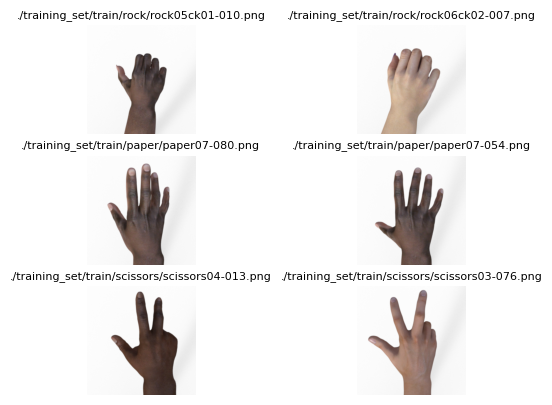

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]
fig,axs=plt.subplots(3, 2)
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  subfigura=axs[i//2][i%2]
  subfigura.imshow(img)
  subfigura.axis('Off')
  subfigura.set_title(img_path,fontsize=8)
  

In [3]:
#!pip install keras-preprocessing
import tensorflow as tf
import keras_preprocessing  #si no lo tienes, pip install keras-preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator




#Los generadores leen las imágenes de sus respectivos directorios (rock, paper, scissors), por lo que 
# detecta la etiqueta de clase verdadera automáticamente

#además, aumentan el repertorio de imágenes en tiempo real: Reescalar, rango de rotación, etc...
# "previene el overfitting"
TRAINING_DIR = "./training_set/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

#lo mismo para los datos de test
VALIDATION_DIR = "./training_set/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)



2023-03-05 19:31:47.944849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 19:31:48.746456: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 19:31:48.746487: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 19:31:51.479600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [4]:
import tensorflow as tf
#crear el modelo 
model = tf.keras.models.Sequential([
    # La forma de entrada (input shape) es el tamaño de las imágenes: 150x150 pixeles * 3 colores por pixel
    # Primera convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Tercera convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Cuarta convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Aplanar resultados para alimentar una DNN
    tf.keras.layers.Flatten(),
    # dropout para evitar overfitting
    tf.keras.layers.Dropout(0.5),
    # capa oculta de 512 neuronas
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#fijate que no pasamos las etiquetas de clase, esto es porque al usar los generadores, se infiere la etiqueta desde la carpeta origen
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

2023-03-05 19:31:54.975892: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 19:31:54.976685: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 19:31:54.976778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alvaro-Lenovo-V110-15AST): /proc/driver/nvidia/version does not exist
2023-03-05 19:31:54.977958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2023-03-05 19:31:58.176725: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2023-03-05 19:32:00.668692: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.


 1/79 [..............................] - ETA: 7:13 - loss: 1.0851 - accuracy: 0.3750

2023-03-05 19:32:01.594834: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2023-03-05 19:32:04.054349: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.


 2/79 [..............................] - ETA: 4:16 - loss: 2.5799 - accuracy: 0.3438

2023-03-05 19:32:04.923923: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.


79/79 [==============================] - 291s 4s/step - loss: 1.1482 - accuracy: 0.3833 - val_loss: 1.1187 - val_accuracy: 0.3333
Epoch 2/25
79/79 [==============================] - 287s 4s/step - loss: 0.9084 - accuracy: 0.5520 - val_loss: 0.4603 - val_accuracy: 0.6828
Epoch 3/25
79/79 [==============================] - 284s 4s/step - loss: 0.6562 - accuracy: 0.7139 - val_loss: 0.5023 - val_accuracy: 0.7016
Epoch 4/25
79/79 [==============================] - 293s 4s/step - loss: 0.4437 - accuracy: 0.8187 - val_loss: 0.1038 - val_accuracy: 0.9785
Epoch 5/25
79/79 [==============================] - 292s 4s/step - loss: 0.3327 - accuracy: 0.8806 - val_loss: 0.1039 - val_accuracy: 0.9704
Epoch 6/25
79/79 [==============================] - 287s 4s/step - loss: 0.2419 - accuracy: 0.9060 - val_loss: 0.0755 - val_accuracy: 0.9758
Epoch 7/25
79/79 [==============================] - 288s 4s/step - loss: 0.1916 - accuracy: 0.9246 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 8/25
79/79 [======

In [5]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

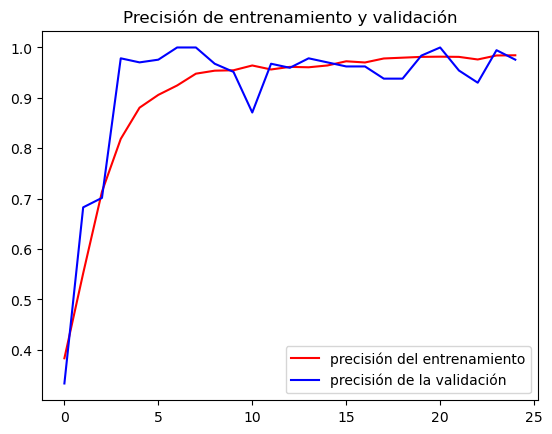

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='precisión del entrenamiento')
plt.plot(epochs, val_acc, 'b', label='precisión de la validación')
plt.title('Precisión de entrenamiento y validación')
plt.legend(loc=0)
plt.figure()

plt.show()

In [9]:
!pip install google-colab
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predecir imágenes
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 kB 4.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 kB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.4/245.4 kB 2.0 MB/s eta 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.4 MB/s eta 0:00:001.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.6 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.7 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.8 MB/s eta 0:00:002.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.0 MB/s eta 0:00:001.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 2.4 MB/s eta 0:00:003.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 1.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 1.4 MB/s eta 0:00:001.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.8 MB/s eta 0:00:001.9 MB/s eta 0:00:01

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1079 lines of output]
      /tmp/pip-install-r5tgj0e8/pandas_970ca4797009460098bd6271d7f3ef4f/setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-39
      creating build/lib.linux-x86_64-cpython-39/pandas
      copying pandas/testing.py -> build/lib.linux-x86_64-cpython-39/pandas
      copying pandas/_version.py -> build/lib.linux-x86_64-cpython-39/pandas
      copying pandas/__init__.py -> build/lib.linux-x86_64-cpython-39/pandas
      copying pandas/conftest.py -> build/lib.linux-x86_64-cpython-39/pandas
      creating build/lib.linux-x86_64-cpython-39/pandas/api
      copying pandas/api/__init__.py -> build/lib.l

  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13384 sha256=0924ba5e3a111072e9c91bc5831f9c4059c7ad2651a8ac3aa4ddd862e8bc7106
  Stored in directory: /home/alvaro/.cache/pip/wheels/79/f4/2b/306dbe0f6b429a1ccb56aef907984a2f21bd6cb7f702b65d05
  Created wheel for tornado: filename=tornado-4.5.3-cp39-cp39-linux_x86_64.whl size=423420 sha256=80449d70ea4d935ca20adc646b182c875d95495b604c1fd2af9c20b2d6d3b480
  Stored in directory: /home/alvaro/.cache/pip/wheels/83/38/94/6e1e08dd9ed83e2fc92914d24bf950c39e622dfbb12bf753d8
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5059 sha256=ba56490114855325d75795c1d0d7a58af6513c23954967eb97e005d97037d28d
  Stored in directory: /home/alvaro/.cache/pip/wheels/a7/bd/0d/d95b629ee4a7368830202858e45ac76cd837a42cafa50da81e
Successfully built google-colab portpicker tornado simplegeneric
Failed to build pandas
  Attempting uninstall: tornado
    Found existing installation: tornado 6.2
    Unins

  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/hashtable_func_helper.pxi.in
   from /tmp/pip-uninstall-ks639m30/_libs/hashtable_func_helper.pxi.in
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/index.pyi
   from /tmp/pip-uninstall-ks639m30/_libs/index.pyi
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/index.pyx
   from /tmp/pip-uninstall-ks639m30/_libs/index.pyx
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/index_class_helper.pxi.in
   from /tmp/pip-uninstall-ks639m30/_libs/index_class_helper.pxi.in
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/indexing.pyx
   from /tmp/pip-uninstall-ks639m30/_libs/indexing.pyx
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/internals.pyi
   from /tmp/pip-uninstall-ks639m30/_libs/internals.pyi
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/internals.py

  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/timezones.pyi
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/timezones.pyi
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/timezones.pyx
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/timezones.pyx
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/tzconversion.pxd
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/tzconversion.pxd
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/tzconversion.pyi
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/tzconversion.pyi
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/tzconversion.pyx
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/tzconversion.pyx
  Moving to /home/alvaro/anaconda3/lib/python3.9/site-packages/pandas/_libs/tslibs/util.pxd
   from /tmp/pip-uninstall-ks639m30/_libs/tslibs/util.pxd
  Moving to /home/alvaro/anacond

ModuleNotFoundError: No module named 'google.colab'

In [10]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = 'C:\\Users\\ilope\\Dropbox\\__PIA\\proyectos\\Proyecto2\\rectangulo.png'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ilope\\Dropbox\\__PIA\\proyectos\\Proyecto2\\rectangulo.png'

In [11]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/rock1.png'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [235. 235. 235.]
  [235. 235. 235.]
  [235. 235. 235.]]

 [[253. 253. 253.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [236. 236. 236.]
  [234. 234. 234.]
  [236. 236. 236.]]

 [[253. 253. 253.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [234. 234. 234.]
  [236. 236. 236.]
  [235. 235. 235.]]

 ...

 [[252. 252. 252.]
  [251. 251. 251.]
  [252. 252. 252.]
  ...
  [247. 247. 247.]
  [248. 248. 248.]
  [247. 247. 247.]]

 [[251. 251. 251.]
  [253. 253. 253.]
  [251. 251. 251.]
  ...
  [246. 246. 246.]
  [248. 248. 248.]
  [247. 247. 247.]]

 [[252. 252. 252.]
  [251. 251. 251.]
  [251. 251. 251.]
  ...
  [249. 249. 249.]
  [248. 248. 248.]
  [248. 248. 248.]]]
1/1 [==============================] - 0s 273ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/rock1.png
[[0. 1. 0.]]


In [12]:
# predecir imágenes

path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/paper1.png'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 ...

 [[250. 250. 250.]
  [249. 249. 249.]
  [250. 250. 250.]
  ...
  [240. 240. 240.]
  [245. 245. 245.]
  [245. 245. 245.]]

 [[250. 250. 250.]
  [250. 250. 250.]
  [250. 250. 250.]
  ...
  [243. 243. 243.]
  [241. 241. 241.]
  [245. 245. 245.]]

 [[250. 250. 250.]
  [249. 249. 249.]
  [249. 249. 249.]
  ...
  [243. 243. 243.]
  [244. 244. 244.]
  [244. 244. 244.]]]
1/1 [==============================] - 0s 59ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/paper1.png
[[1. 0. 0.]]


In [13]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/scissors1.png'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [252. 252. 252.]
  [253. 253. 253.]
  [252. 252. 252.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [252. 252. 252.]
  [253. 253. 253.]
  [251. 251. 251.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 ...

 [[249. 249. 249.]
  [248. 248. 248.]
  [249. 249. 249.]
  ...
  [248. 248. 248.]
  [249. 249. 249.]
  [248. 248. 248.]]

 [[248. 248. 248.]
  [248. 248. 248.]
  [249. 249. 249.]
  ...
  [247. 247. 247.]
  [247. 247. 247.]
  [249. 249. 249.]]

 [[249. 249. 249.]
  [248. 248. 248.]
  [248. 248. 248.]
  ...
  [250. 250. 250.]
  [249. 249. 249.]
  [249. 249. 249.]]]
1/1 [==============================] - 0s 60ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/training_set/extras/scissors1.png
[[0. 0. 1.]]


In [14]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/tijera1.jpeg'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[192. 169. 153.]
  [188. 162. 145.]
  [181. 154. 137.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[192. 149. 104.]
  [193. 150. 105.]
  [194. 151. 108.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[202. 160. 112.]
  [203. 160. 115.]
  [205. 162. 117.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
1/1 [==============================] - 0s 58ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/tijera1.jpeg
[[0. 0. 1.]]


In [15]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/piedra1.jpeg'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 [[245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 [[245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 ...

 [[207. 162. 120.]
  [210. 165. 123.]
  [212. 167. 125.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 [[207. 162. 120.]
  [210. 165. 123.]
  [213. 168. 127.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 [[215. 170. 131.]
  [220. 172. 134.]
  [222. 174. 138.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]]
1/1 [==============================] - 0s 58ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/piedra1.jpeg
[[0. 1. 0.]]


In [16]:
# predecir imágenes
# Falla en la predicción, la imagen cargada no es óptima.
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/papel1.jpeg'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
1/1 [==============================] - 0s 61ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/papel1.jpeg
[[0. 0. 1.]]


In [17]:
# predecir imágenes
from tensorflow.keras.preprocessing import image
path = '/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/papel2.jpeg'
img = image.load_img(path, target_size=(150, 150))

x = image.img_to_array(img)
print(x)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
1/1 [==============================] - 0s 60ms/step
/home/alvaro/Escritorio/C/CEIA/PIA/UT4/Práctica_4.6_PIA_Álvaro_García_Rodrigo/papel2.jpeg
[[1. 0. 0.]]
